In [5]:
def zero_pad(arr,kernel_half):
    x,y=np.shape(arr)
    pad_h=np.zeros((arr.shape[0],kernel_half))
    arr=np.hstack((pad_h,arr))
    arr=np.hstack((arr,pad_h))
    pad_v=np.zeros((kernel_half,arr.shape[1]))
    arr=np.vstack((pad_v,arr))
    arr=np.vstack((arr,pad_v))
    return arr

In [6]:
import numpy as np
import cv2

imgL=cv2.imread('stereo_images/1L.jpg')
imgR=cv2.imread('stereo_images/1R.jpg')
imgL_gray=cv2.cvtColor(imgL,cv2.COLOR_BGR2GRAY)
imgR_gray=cv2.cvtColor(imgR,cv2.COLOR_BGR2GRAY)
#print(imgL_gray.shape,imgR_gray.shape)
points = cv2.goodFeaturesToTrack(imgL_gray,500,.1,5)
num_points=len(points)
points=np.reshape(points,(num_points,2))
#print(points)
points_x=points[:,1]
points_y=points[:,0]
arr  =imgL_gray
arr2 =imgR_gray
#print(arr.shape,arr2.shape)
x,y=np.shape(arr2)
matches=np.empty((num_points,4))
kernel=3
#diff=np.empty((3,3))
count=0
kernel_half=int(kernel/2)
arr=zero_pad(arr,kernel_half)
arr2=zero_pad(arr2,kernel_half)
print(arr.shape,arr2.shape)
for (u,v) in zip(points_x,points_y):
    temp=arr[int(u)-kernel_half:int(u)+kernel_half+1,int(v)-kernel_half:int(v)+kernel_half+1]
    temp=temp.flatten()
    #temp=np.reshape(temp,(len(temp)))
    #print(temp.shape)
    ssd=[]
    idx_x=[]
    idx_y=[]
    #print('next point')
    for i in range(kernel_half,x+kernel_half,1):
        for j in range(kernel_half,y+kernel_half,1):
            win=arr2[i-kernel_half:i+kernel_half+1,j-kernel_half:j+kernel_half+1]
            #print(win.shape)
            win=win.flatten()
            #win=np.reshape(win,(len(win)))
            #print(win.shape)
            diff=np.dot(temp,win)
            if np.linalg.norm(temp)!=0 and np.linalg.norm(win)!=0:
                diff=diff/np.linalg.norm(temp)
                diff=diff/np.linalg.norm(win)
            elif np.linalg.norm(temp)==0 and np.linalg.norm(win)!=0:
                diff=diff/0.00000001
                diff=diff/np.linalg.norm(win)
            elif np.linalg.norm(temp)!=0 and np.linalg.norm(win)==0:
                diff=diff/0.00000001
                diff=diff/np.linalg.norm(temp)
            elif np.linalg.norm(temp)==0 and np.linalg.norm(win)==0:
                diff=diff/0.00000001
                diff=diff/0.00000001
            ssd.append(diff)
            idx_x.append(i)
            idx_y.append(j)
    index=np.argwhere(ssd==max(ssd))
    matches[count,0]=u
    matches[count,1]=v
    matches[count,2]=idx_x[index[0][0]]
    matches[count,3]=idx_y[index[0][0]]
    count+=1
print(matches)

(127, 170) (127, 170)
[[ 88.  60. 125.  76.]
 [ 86.  93.  84.  71.]
 [ 25. 100.  25. 100.]
 [ 77.  63.  77.  63.]
 [ 88.  65.  88.  65.]
 [ 87.  76.  86.  76.]
 [ 79. 105.  79. 104.]
 [ 92.  53.  90.  11.]
 [ 44.  59.  44.  59.]
 [ 59. 155.  59. 148.]
 [ 42.  76.  42.  76.]
 [ 69.  63. 112. 108.]
 [ 54. 113.  52. 108.]
 [ 54. 124.  91. 160.]
 [ 72.  47. 119.  74.]
 [ 64.  62.  64.  62.]
 [ 54. 108.  41. 108.]
 [119.  39. 109.  13.]
 [ 85. 112.  85. 112.]
 [ 70. 107. 113.  23.]
 [ 87. 144.  87. 144.]
 [ 59.  98.  64.  81.]
 [ 38.  80.  38.  80.]
 [ 84.  38. 120.  14.]
 [ 62.  74.  62.  74.]
 [111.  82. 120. 125.]
 [ 52.  80.  52.  80.]
 [ 50.  71.  50.  71.]
 [ 99.  44.  99.  44.]
 [ 72.  78.  72.  78.]
 [ 84.  43. 120.  14.]
 [120.  71. 120.  74.]
 [ 41.  66.  41.  66.]
 [ 93.  48.  89.  50.]
 [ 85. 125.  63.  94.]
 [ 50.  59.  50.  59.]
 [ 81. 135.  79. 133.]
 [ 58.  93.  58.  93.]
 [ 87. 107. 124.  17.]
 [115.  46.  84.  39.]
 [101.  76.  99. 147.]
 [ 59.  61.  59.  61.]
 [ 63.  79. 

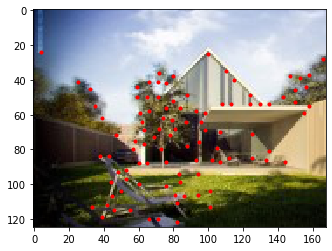

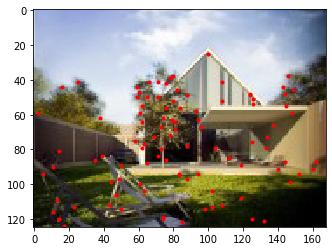

In [7]:
import matplotlib.pyplot as plt
# num_points=150
# points = cv2.goodFeaturesToTrack(imgL_gray,num_points,.1,15)
# points=np.reshape(points,(num_points,2))
#print(points)
img1 = plt.imread('stereo_images/1L.jpg')
plt.plot(matches[:,1],matches[:,0],'r.')  

plt.imshow(img1)
plt.savefig('stereo_1L.jpg')
plt.show()
img2 = plt.imread('stereo_images/1R.jpg')
plt.plot(matches[:,3],matches[:,2],'r.')  

plt.imshow(img2)
plt.savefig('stereo_1R.jpg')
plt.show()